# Hanan Basheer (20B030018)
## Assignment 3

In [233]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
sns.set_context("notebook")

### Static Cylinder of radius = 1

In [234]:
def modulus(z):
    return np.sqrt((z.real)**2 + (z.imag)**2)

def phi(x, y):
    r = 1
    u_inf = 1
    z = x + (y * 1j)
    return u_inf * (z + ((r**2) / z))

def velocity(x, y):
    r = 1
    u_inf = 1
    z = x + (y * 1j)
    return u_inf * (1 - (r / z)**2)

def speed(x, y):
    return modulus(velocity(x, y))

def pressure(x, y):
    r = 1
    u_inf = 1
    p_inf = 1
    rho = 1
    u, v = velocity(x, y).real, -velocity(x, y).imag
    return rho * (1.5 - 0.5 * (u**2 + v**2))

def cp(x, y):
    r = 1
    u_inf = 1
    p_inf = 1
    rho = 1
    return 2 * (pressure(x, y) - p_inf) / (rho * (u_inf**2))

def cp_polar(r, theta):
    return cp(r * np.cos(theta), r * np.sin(theta))

In [235]:
r, theta = np.mgrid[1:6:100j, 0:(2 * np.pi):360j]
x, y = r * np.cos(theta), r * np.sin(theta)

#### $C_p$ plot w.r.t theta

Text(0, 0.5, 'Cp')

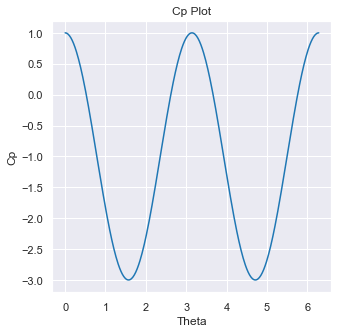

In [236]:
theta = np.mgrid[0:2*np.pi:360j]
cp_surface = cp_polar(1, theta)
plt.figure(figsize = (5, 5))
plt.plot(theta, cp_surface)
plt.title('Cp Plot')
plt.xlabel('Theta')
plt.ylabel('Cp')

#### Pressure Field Plot

Text(0.5, 1.0, 'Pressure Field Plot')

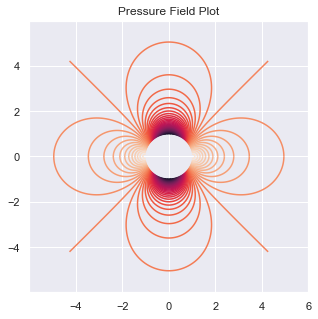

In [237]:
p = pressure(x, y)
plt.figure(figsize = (5, 5))
plt.contour(x, y, p, levels = 60)
plt.title('Pressure Field Plot')

#### Surface Velocity plot w.r.t theta

Text(0, 0.5, 'Surface Velocity')

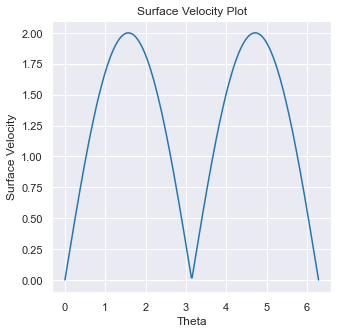

In [238]:
speed_surface = speed(np.cos(theta), np.sin(theta))
plt.figure(figsize = (5, 5))
plt.plot(theta, speed_surface)
plt.title('Surface Velocity Plot')
plt.xlabel('Theta')
plt.ylabel('Surface Velocity')

#### Streamline PLots

Text(0.5, 1.0, 'Streamlines Plot')

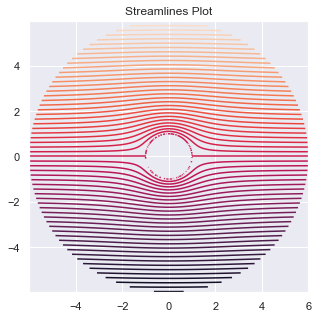

In [239]:
plt.figure(figsize=(5, 5))
plt.contour(x, y, phi(x,y).imag,levels = 60)
plt.title('Streamlines Plot')

#### Potential plot

Text(0.5, 1.0, 'Potential Plot')

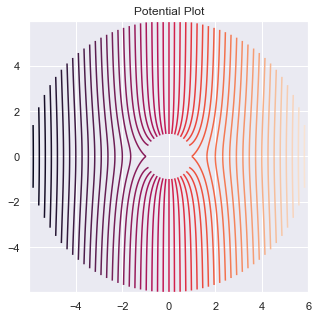

In [240]:
plt.figure(figsize=(5, 5))
plt.contour(x, y, phi(x,y).real,levels = 60)
plt.title('Potential Plot')

### Rotating Cylinder of radius = 1

In [241]:
def modulus(z):
    return np.sqrt((z.real)**2 + (z.imag)**2)

def phi_rot(x, y, g):
    r = 1
    u_inf = 1
    z = x + (y * 1j)
    return u_inf * (z + ((r**2) / z)) - ((g * np.log(z)) / (2 * np.pi)) * 1j

def velocity_rot(x, y, g):
    r = 1
    u_inf = 1
    z = x + (y * 1j)
    return u_inf * (1 - (r / z)**2) - (g / (2 * np.pi * z)) * 1j

def speed_rot(x, y, g):
    return modulus(velocity_rot(x, y, g))

def pressure_rot(x, y, g):
    r = 1
    u_inf = 1
    p_inf = 1
    rho = 1
    u, v = velocity_rot(x, y, g).real, -velocity_rot(x, y, g).imag
    return rho * (1.5 - 0.5 * (u**2 + v**2))

def cp_rot(x, y, g):
    r = 1
    u_inf = 1
    p_inf = 1
    rho = 1
    return 2 * (pressure(x, y) - p_inf) / (rho * (u_inf**2))

def cp_polar_rot(r, theta, g):
    return cp_rot(r * np.cos(theta), r * np.sin(theta), g)

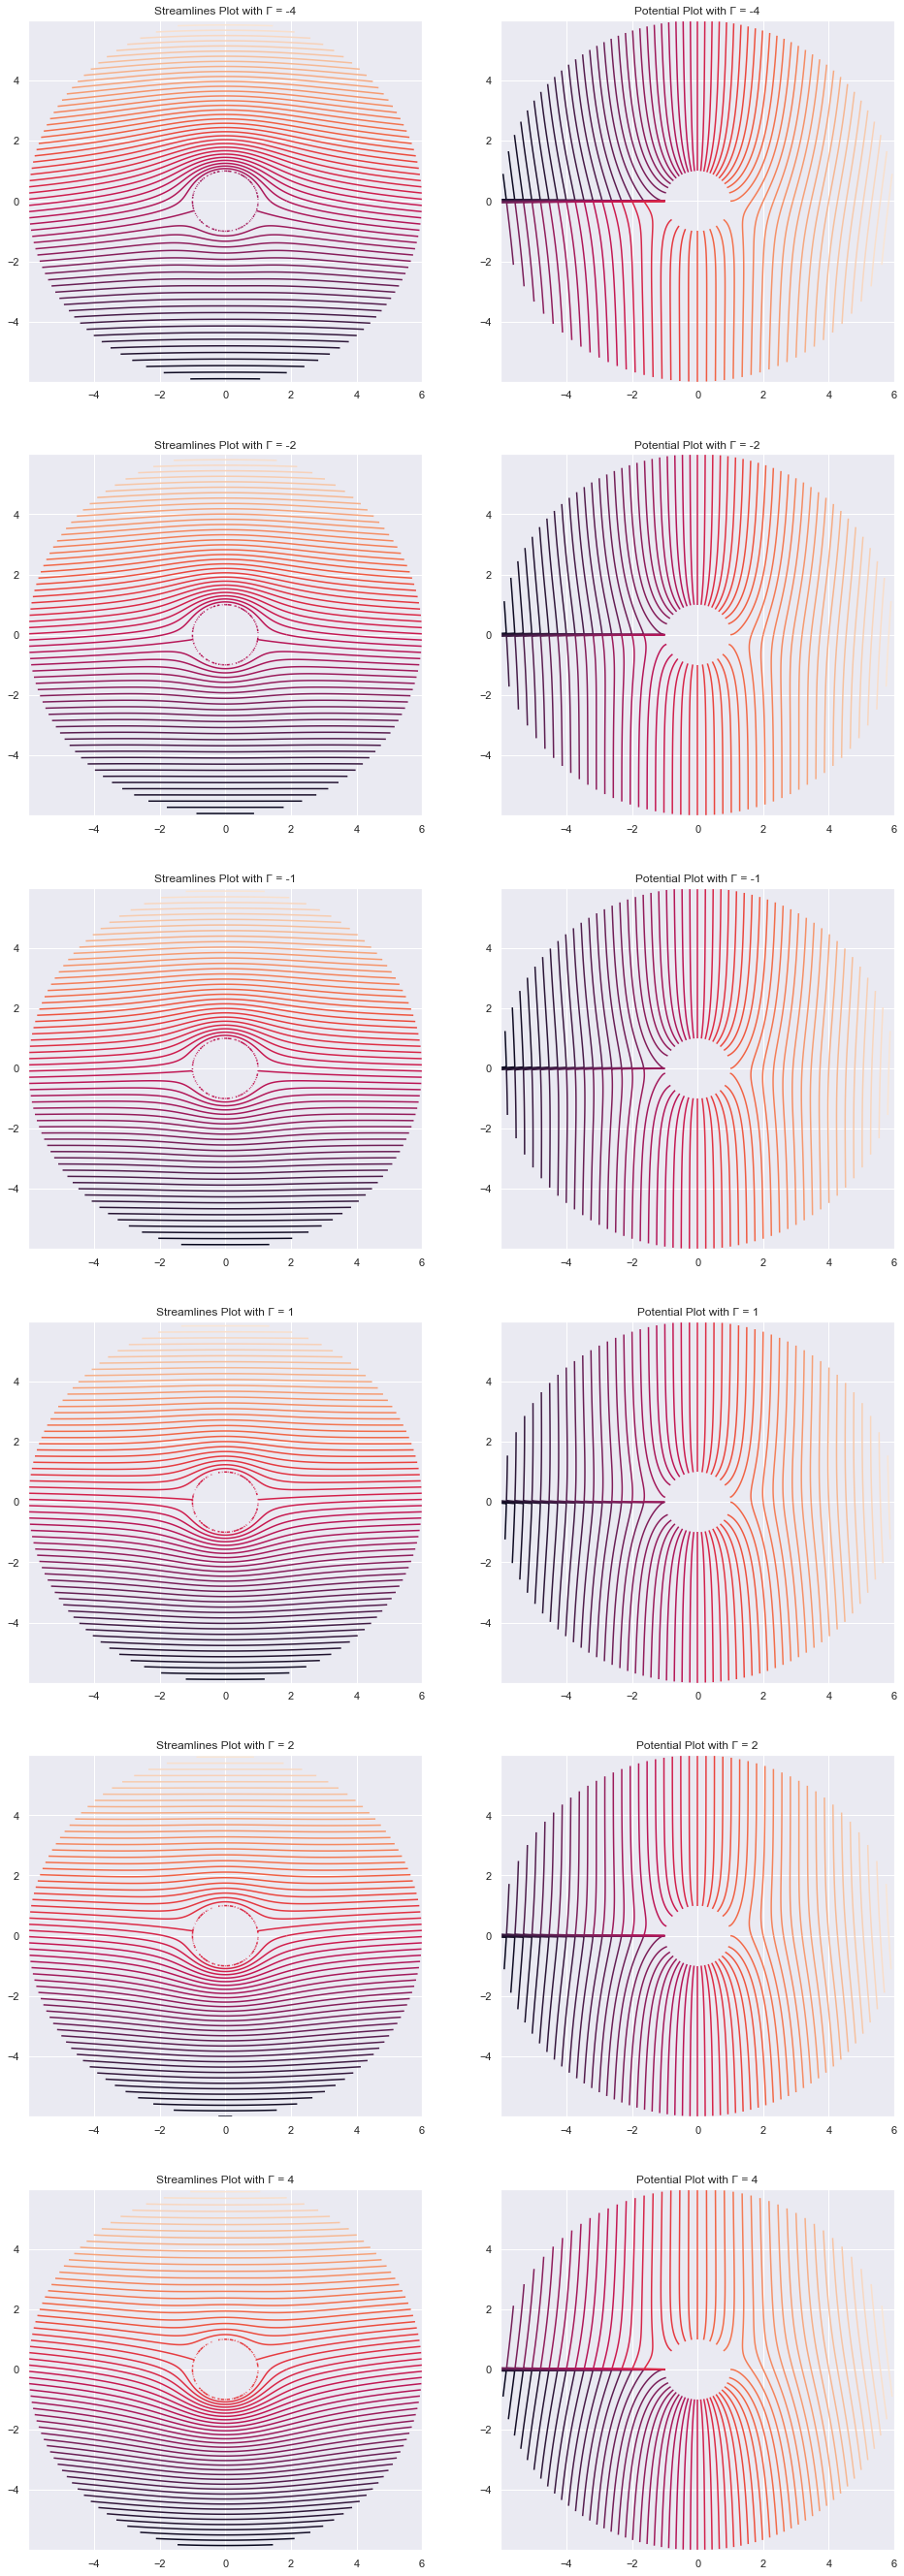

In [242]:
plot = plt.figure(figsize=(16, 48))
i = 1
for gamma in [-4, -2, -1, 1, 2, 4]:
    plot.add_subplot(6, 2, i)
    plt.contour(x,y,phi_rot(x, y, gamma).imag,levels = 60)
    plt.title('Streamlines Plot with \u0393 = ' + str(gamma))

    plot.add_subplot(6, 2, i + 1)
    plt.contour(x,y,phi_rot(x, y, gamma).real,levels = 60)
    plt.title('Potential Plot with \u0393 = ' + str(gamma))
    i += 2

#### Pressure Field Plot

Text(0.5, 1.0, 'Pressure Field Plot')

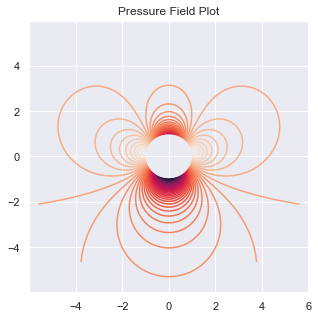

In [243]:
p = pressure_rot(x,y, g = 2)
plt.figure(figsize = (5, 5))
plt.contour(x, y, p, levels = 60)
plt.title('Pressure Field Plot')

In [244]:
theta = np.mgrid[0:2*np.pi:360j]

#### $C_p$ Plot w.r.t theta

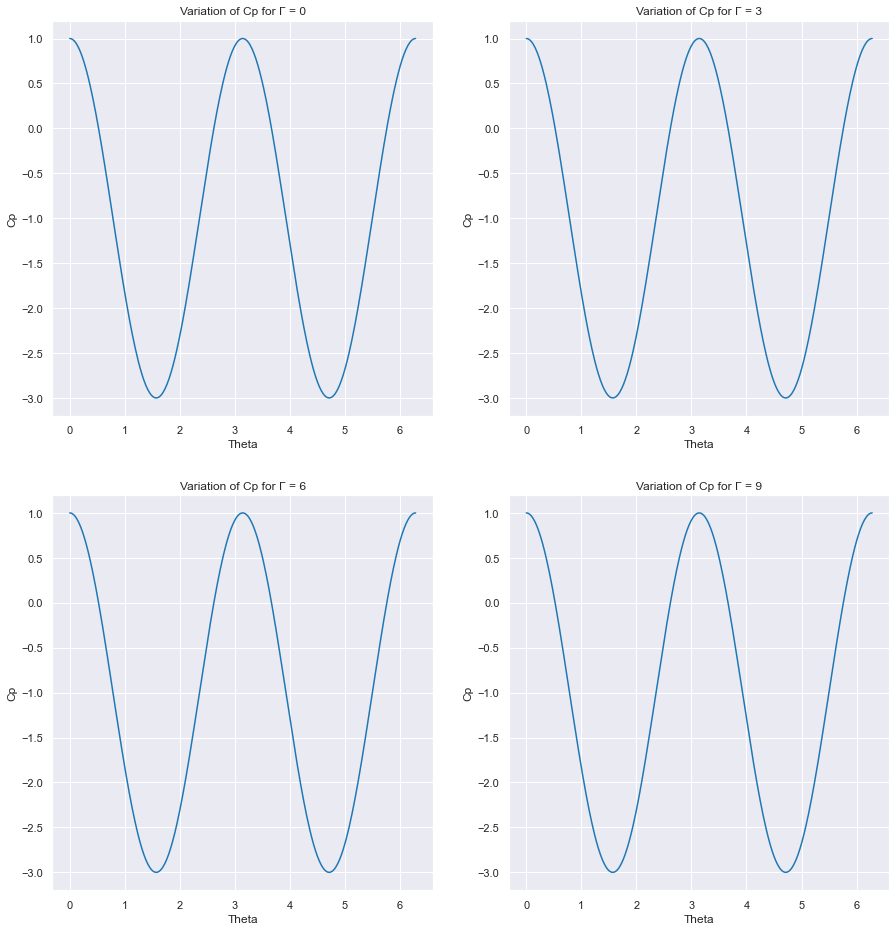

In [245]:
plot = plt.figure(figsize = (15, 16))
for i, gamma in enumerate([0, 3, 6, 9]):
    cp_surface = cp_polar_rot(1, theta, gamma)
    plot.add_subplot(2, 2, i+1)
    plt.plot(theta, cp_surface)
    plt.title('Variation of Cp for \u0393 = ' + str(gamma))
    plt.xlabel('Theta')
    plt.ylabel('Cp')

#### Surface Velocity w.r.t theta

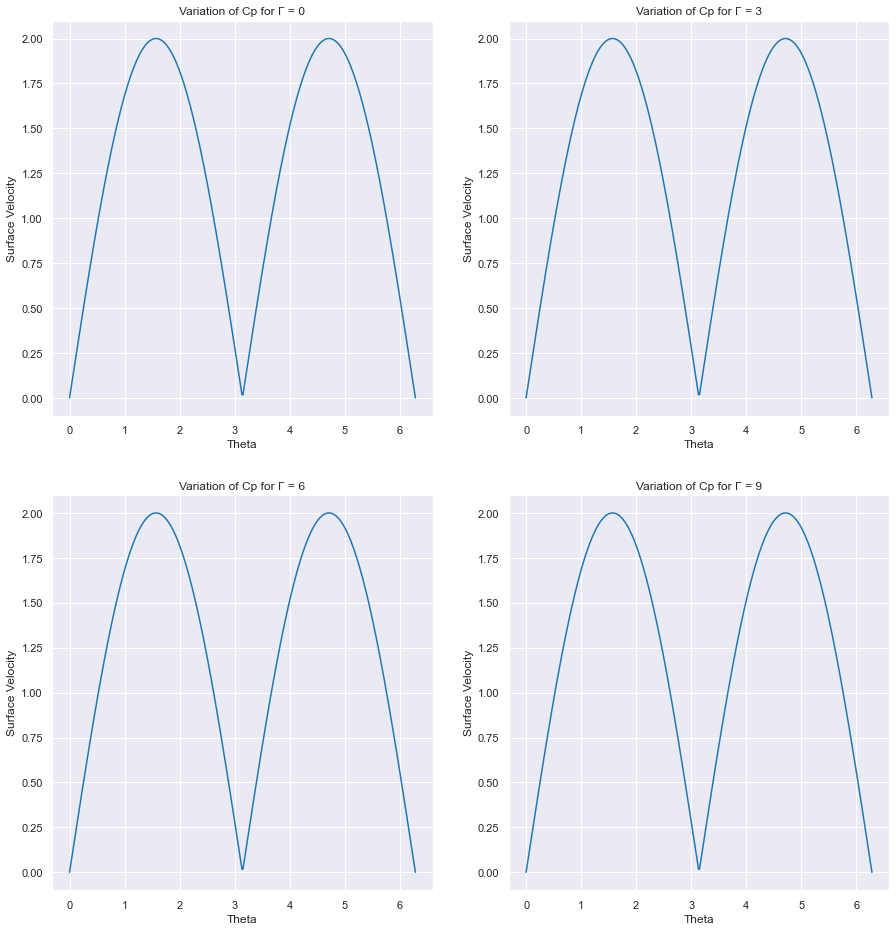

In [246]:
plot = plt.figure(figsize = (15, 16))
for i, gamma in enumerate([0, 3, 6, 9]):
    cp_surface = speed_rot(1, theta, gamma)
    plot.add_subplot(2, 2, i+1)
    plt.plot(theta, speed_surface)
    plt.title('Variation of Cp for \u0393 = ' + str(gamma))
    plt.xlabel('Theta')
    plt.ylabel('Surface Velocity')